In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from scipy.stats import ttest_rel, ttest_1samp, ttest_ind, kstest, wilcoxon

import glob
import os

import pickle
import sys

sys.path.append('../utils')
from ERP_utils import *

In [2]:
erp_times = np.load('erp_times.npy')
motor_diff = np.load('motor_diff.npy')
listen_pre = np.load('listen_all_pre.npy')
listen_post = np.load('listen_all_post.npy')
motor_pre = np.load('motor_all_pre.npy')
motor_post = np.load('motor_all_post.npy')
error_pre = np.load('error_pre_all.npy')

In [3]:
#get channel names
with open('../utils/ch_names.pkl', 'rb') as file:
    ch_names_all = pickle.load(file)

ch_names_72 = ch_names_all[0:72]
downfreq = 128

#channels of interest
p_channels = ['Cz', 'FCz']
eeg_channels = ch_names_72[0:64]
p_ch_idx = ch_index(p_channels)


In [4]:
def ERP_mean_sem(array, channels):
    mean_data = array.mean(axis = 0)[channels].mean(axis = 0)
    sem_data = array.std(axis=0)[p_ch_idx].mean(axis = 0) / np.sqrt(array.shape[0])
    mean_data = np.array([x * 1000000 for x in mean_data])
    sem_data = np.array([x * 1000000 for x in sem_data])
    
    return mean_data, sem_data


In [5]:

listen_mean, listen_sem = ERP_mean_sem(listen_pre, p_ch_idx)
motor_mean, motor_sem = ERP_mean_sem(motor_pre, p_ch_idx)
error_mean, error_sem = ERP_mean_sem(error_pre, p_ch_idx)
listen_post_mean, listen_post_sem = ERP_mean_sem(listen_post, p_ch_idx)

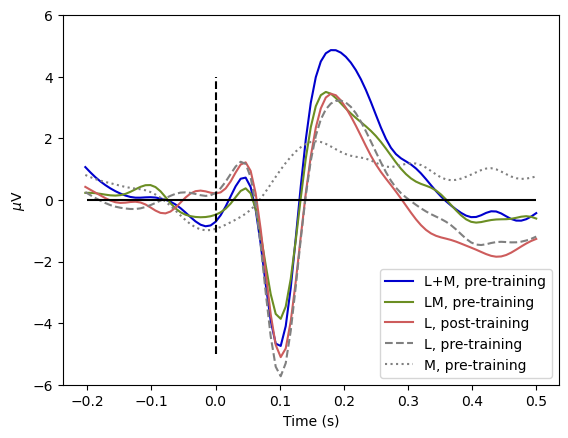

In [10]:
plt.plot(erp_times, listen_mean+motor_mean, color = 'mediumblue', label = 'L+M, pre-training')
plt.plot(erp_times, error_mean, color = 'olivedrab', label = 'LM, pre-training')
plt.plot(erp_times, listen_post_mean, color = 'indianred', label = 'L, post-training')

plt.plot(erp_times, listen_mean, color = 'gray', label = 'L, pre-training', linestyle = '--')
plt.plot(erp_times, motor_mean, color = 'gray', label = 'M, pre-training', linestyle = ':')


#aesthetics
plt.hlines(0, -0.2, 0.5, color = 'black')
plt.vlines(0, -5, 4, color = 'black', linestyles= '--')
plt.ylabel('$\mu$V')
plt.xlabel('Time (s)')
plt.ylim(-6,6)
plt.legend(loc = 'lower right')

plt.savefig('../figures/AM_comparison.svg')